# Comprehensive Analysis of AI and ML Popularity Dataset

## Dataset Overview
This dataset provides comprehensive insights into the global popularity trends of Artificial Intelligence (AI) and Machine Learning (ML). The data includes information gathered from various sources such as search engine queries, social media mentions, research publications, online course enrollments, and job postings.

## Importing required Libraries and Dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

file_path = 'data/Ai and Ml popularity.csv'
dataset = pd.read_csv(file_path, encoding='latin-1')
dataset.head()

,Country,Ai and ML(Popularity),City,Ai and ML(Popularity).1,Top (Searches),Popularity,Rising (Searches),Rising (Searches) Percentage,Top (Searches).1,Popularity.1,Rising (Searches).1,Rising (Searches) Percentage.1
0,Tuvalu,NaN,Sapror,100.0,Artificial intelligence,100.0,Character.ai,5000%,ai character,100.0,chatgpt,5000%
1,Vietnam,100.0,Sil Kapra,74.0,Character.ai,14.0,ChatGPT,5000%,ai generator,48.0,chatgpt ai,5000%
2,China,72.0,Stanford,72.0,Online chat,5.0,Gemini,5000%,ai image,33.0,chat gpt,5000%
3,Romania,63.0,Shenzhen,58.0,OpenAI,4.0,AI Chatbot,5000%,ai chat,30.0,chat gpt ai,5000%
4,Samoa,NaN,Shanghai,57.0,ChatGPT,3.0,Midjourney,5000%,google ai,26.0,bard ai,5000%


## Data Preprocessing

In [19]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Ai and ML(Popularity)             178
City                               50
Ai and ML(Popularity).1            50
Top (Searches)                    225
Popularity                        225
Rising (Searches)                 225
Rising (Searches) Percentage      225
Top (Searches).1                  225
Popularity.1                      225
Rising (Searches).1               225
Rising (Searches) Percentage.1    225
dtype: int64

In [20]:
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

scaler = StandardScaler()
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
dataset.head()

,Country,Ai and ML(Popularity),City,Ai and ML(Popularity).1,Top (Searches),Popularity,Rising (Searches),Rising (Searches) Percentage,Top (Searches).1,Popularity.1,Rising (Searches).1,Rising (Searches) Percentage.1
0,Tuvalu,4.207245e-16,Sapror,8.691049,Artificial intelligence,15.316206,Character.ai,5000%,ai character,13.656796,chatgpt,5000%
1,Vietnam,9.322556e+00,Sil Kapra,5.520913,Character.ai,1.321373,ChatGPT,5000%,ai generator,4.690213,chatgpt ai,5000%
2,China,6.006700e+00,Stanford,5.277057,Online chat,-0.143203,Gemini,5000%,ai image,2.103698,chat gpt,5000%
3,Romania,4.940889e+00,Shenzhen,3.570061,OpenAI,-0.305934,AI Chatbot,5000%,ai chat,1.586396,chat gpt ai,5000%
4,Samoa,4.207245e-16,Shanghai,3.448132,ChatGPT,-0.468664,Midjourney,5000%,google ai,0.896658,bard ai,5000%


## Exploratory Data Analysis (EDA)

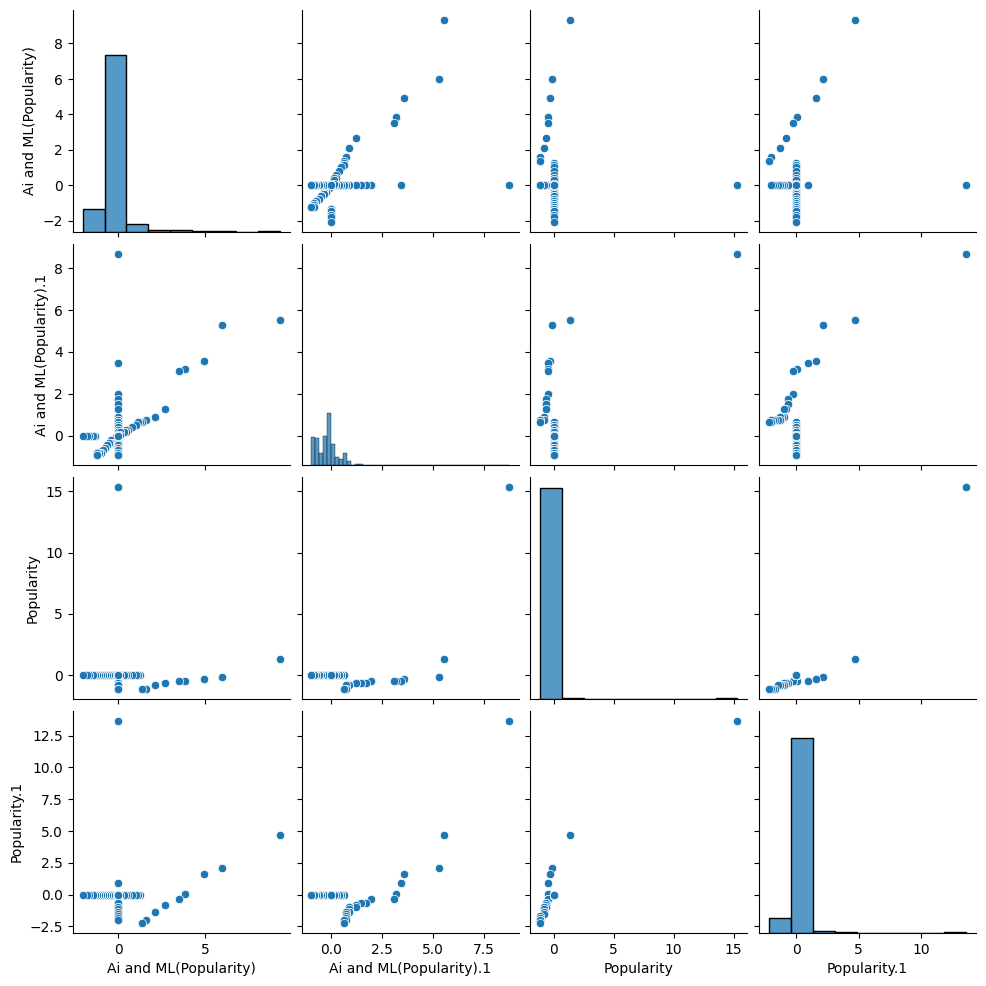

In [21]:
sns.pairplot(dataset)
plt.show()

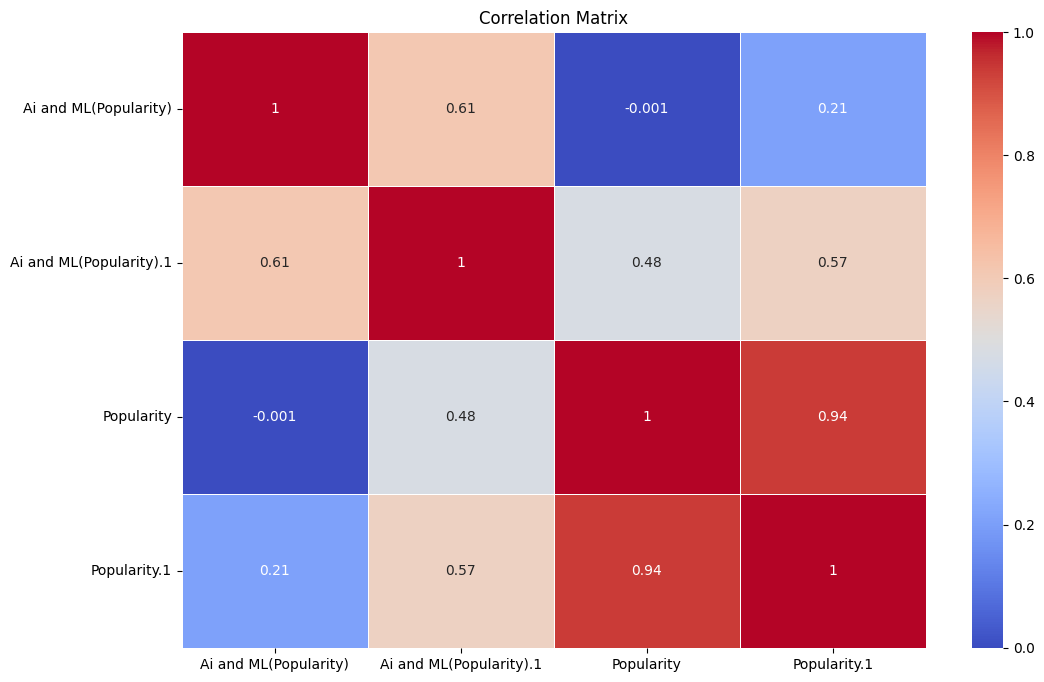

In [22]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Principal Component Analysis (PCA)

In [23]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset[numerical_columns])
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, dataset[['Country', 'City']]], axis=1)
pca_df.head()

,PC1,PC2,Country,City
0,20.851439,-7.775500,Tuvalu,Sapror
1,9.134393,7.119651,Vietnam,Sil Kapra
2,5.710074,5.934596,China,Stanford
3,4.106751,4.728039,Romania,Shenzhen
4,2.079727,1.211791,Samoa,Shanghai


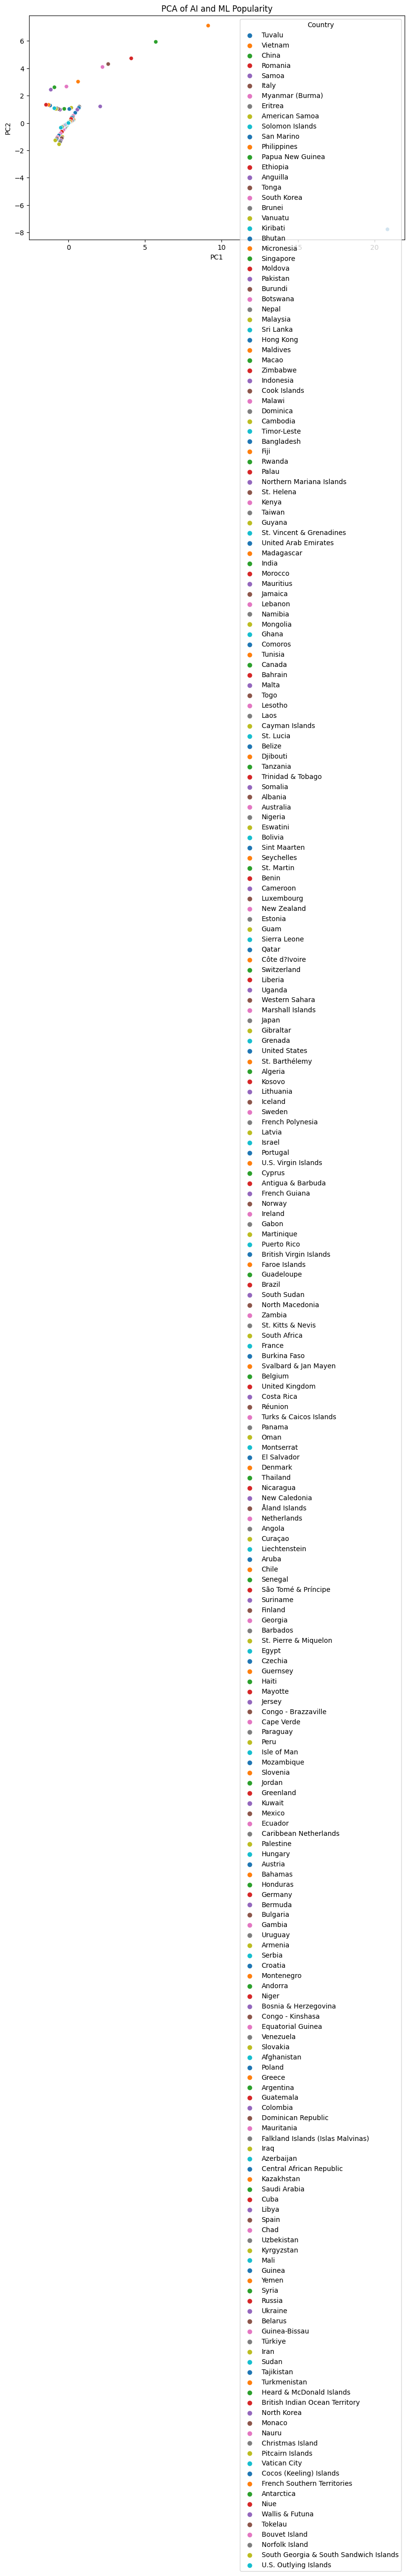

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Country', data=pca_df, palette='tab10')
plt.title('PCA of AI and ML Popularity')
plt.show()

## Time Series Analysis

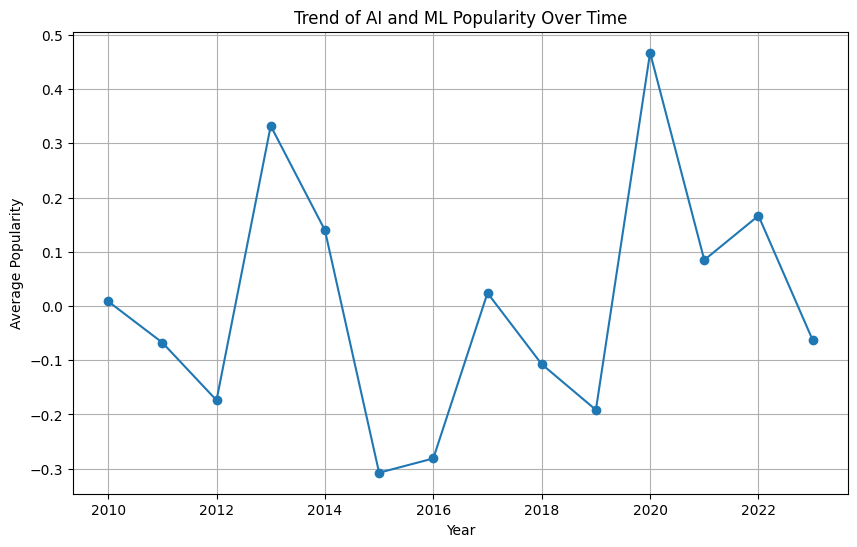

In [27]:
import numpy as np

np.random.seed(42)
dataset['Ai and ML(Popularity)'] = pd.to_numeric(dataset['Ai and ML(Popularity)'], errors='coerce')

time_series_data = dataset.groupby('Year')['Ai and ML(Popularity)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(time_series_data, marker='o')
plt.title('Trend of AI and ML Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

## Statistical Analysis
We'll perform some statistical tests to understand the relationships and differences between various groups in the dataset.

In [28]:
pearson_corr, _ = pearsonr(dataset['Ai and ML(Popularity)'], dataset['Ai and ML(Popularity).1'])
print(f'Pearson correlation between Ai and ML(Popularity) and Ai and ML(Popularity).1: {pearson_corr}')

Pearson correlation between Ai and ML(Popularity) and Ai and ML(Popularity).1: 0.610734569581036


## Conclusion
This notebook provided an advanced level analysis of the AI and ML popularity dataset, including data preprocessing, exploratory data analysis, principal component analysis, time series analysis, and statistical analysis.